In [1]:
import pandas as pd
import numpy  as np
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#from wordcloud import WordCloud
import spacy  # For preprocessing
import nltk
import logging  # Setting up the loggings to monitor gensim
from time import time  # To time our operations
import re  # For preprocessing
#https://scikit-learn.org/stable/modules/clustering.html
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib as mpl

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

df=pd.read_csv("./Datos/modelo_dm0_20_2000.csv",sep="|",index_col=0)
df.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19
id_documento,,,,,,,,,,,,,,,,,,,,
1,-0.114150,-0.470316,0.066456,0.396812,0.309713,0.309934,0.158930,-0.143244,-0.608666,-0.551357,0.400280,0.613506,-0.290649,1.717429,-0.235506,1.411399,0.050213,-0.414502,0.319806,0.124243
2,-1.400765,-0.759957,0.303883,-0.182143,-0.920323,-2.764483,-0.903704,-0.725012,0.514106,-0.454643,0.100113,1.069958,0.102657,-0.283214,-0.802116,0.984764,-1.758157,0.147815,-0.438175,0.536742
3,-1.575998,-1.754042,0.436943,1.178827,0.035127,0.257678,-0.347408,0.094753,-0.804367,-0.363128,1.949073,1.356802,0.374073,0.879407,-0.144139,0.448543,-0.533359,-1.299521,0.691233,-1.100710
4,-0.639433,-0.981315,0.114390,0.046880,-1.094180,-0.790529,-1.639304,-0.020987,-0.812094,0.240467,-0.063899,-0.667463,-0.049547,0.676034,0.229995,-0.032693,0.461650,-0.994536,1.019752,-0.421853
5,0.321193,0.208476,0.438890,0.166335,0.298484,0.167771,-0.281270,-0.841791,0.431160,-0.698627,-0.400279,-0.382391,0.452839,1.686943,-0.072980,1.211647,-0.088271,0.297298,0.665430,-0.706013


In [ ]:
from sklearn.cluster import KMeans

from sklearn import preprocessing

#scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
#X=df
X = scaler.fit_transform(df)
wcss = []
sill = []
ini=20
n=45

for k in range(ini,n):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    preds = kmeans.predict(X)
 
    centers = kmeans.cluster_centers_
    cluster_labels=preds
    score = silhouette_score (X, preds, metric='cosine') 
    wcss.append(kmeans.inertia_)
    sill.append(score)

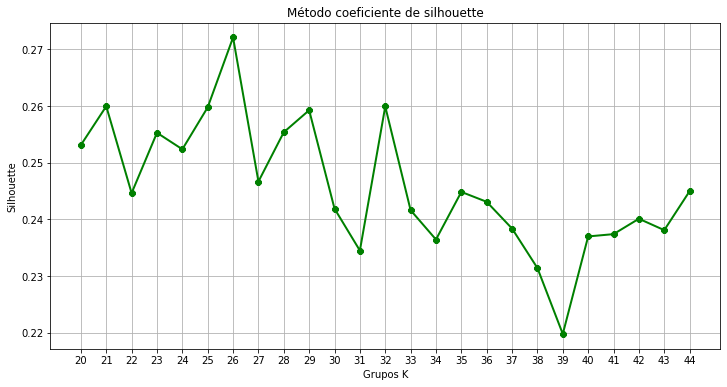

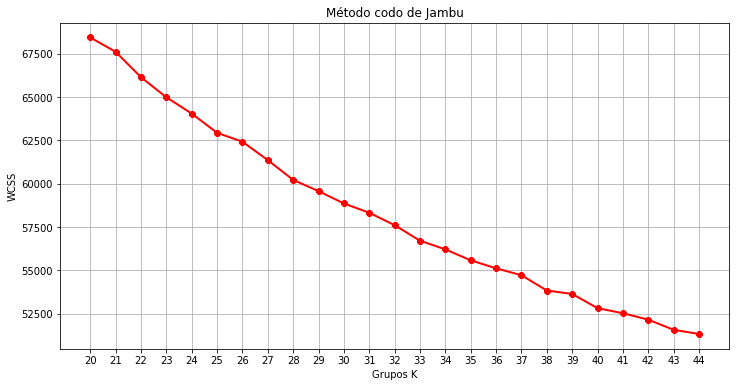

In [8]:
plt.figure(figsize=(12,6))    
plt.title('Método coeficiente de silhouette')
plt.plot(range(ini,n),sill, linewidth=2, color="green", marker ="8")
plt.xlabel("Grupos K")
plt.xticks(np.arange(ini,n,1))
plt.ylabel("Silhouette")
plt.grid()
plt.savefig('./Imagenes/Silhouette.png')



plt.figure(figsize=(12,6))    
plt.grid()
plt.title('Método codo de Jambu')
plt.plot(range(ini,n),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("Grupos K")
plt.xticks(np.arange(ini,n,1))
plt.ylabel("WCSS")
plt.savefig('./Imagenes/WCSS.png')

plt.show()
#sin escalar 0.052
#StandardScaler escaler 0.00525

#cos  sin escalar 0.118
#cos  mis escalar 0.085
#cos  estandar    0.1250

For n_clusters = 43 The average silhouette_score is : 0.25303347966341544


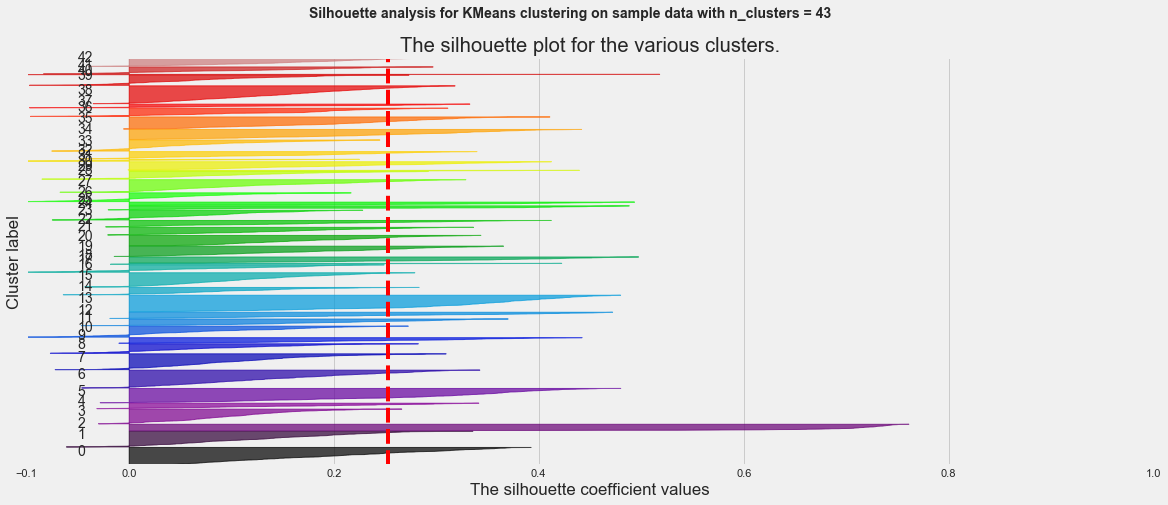

In [95]:
#seleccion clustering
range_n_clusters = [43]
#X=df
#scaler = preprocessing.MinMaxScaler()
#scaler = preprocessing.StandardScaler()

#X = scaler.fit_transform(df)
from sklearn import preprocessing



for n_clusters in range_n_clusters:
    
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans (n_clusters=n_clusters,  init="k-means++")
    preds = clusterer.fit_predict(X)

 
    centers = clusterer.cluster_centers_
    cluster_labels=preds
    score = silhouette_score (X, preds, metric='cosine')
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", score)
    
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=score, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
   # ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
   #             c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
   # ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #            c="white", alpha=1, s=200, edgecolor='k')

   # for i, c in enumerate(centers):
   #     ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
   #                 s=50, edgecolor='k')

   # ax2.set_title("The visualization of the clustered data.")
   # ax2.set_xlabel("Feature space for the 1st feature")
   # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
        
plt.show()    

In [114]:
n_clusters = 43
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(X)
clusters_tesis = kmeans.predict(X)
silhouette_avg = silhouette_score(X, clusters_tesis,metric='cosine')
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.255


In [112]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
matrix_3D = pca.fit_transform(X)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_tesis)

In [115]:
df_cluster=pd.DataFrame({'id_documento':df.index,'grupo':clusters_tesis})
df_cluster.grupo.value_counts()
df_cluster.to_csv("./tesis_grupos.csv",sep="|");


In [60]:
import matplotlib.colors as mcolors
mcolors.ListedColormap

matplotlib.colors.ListedColormap

C:\Users\JBARCO\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


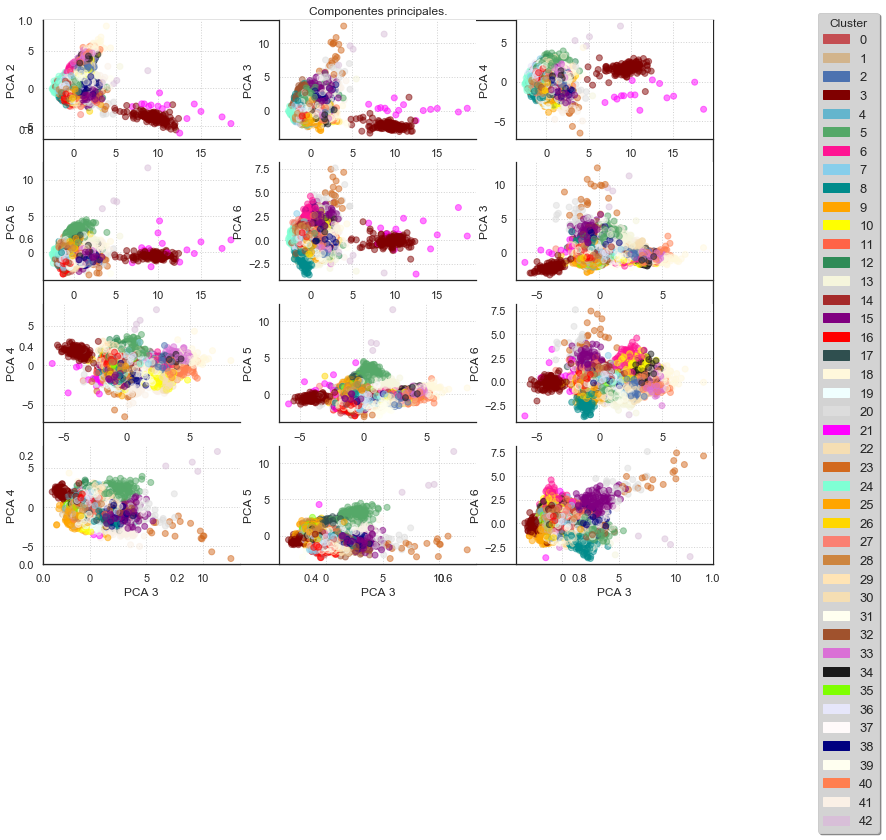

In [84]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'maroon', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen',13:'beige',
                   14:'brown',15:'purple',16:'red',17:'DarkSlateGray',18:'cornsilk',19:'azure',
                   20:'gainsboro',21:'magenta',22:'wheat',23:'chocolate',24:'aquamarine',25:'orange',
                   26:'gold',27:'salmon',28:'peru',29:'moccasin',30:'wheat',
                   31:'ivory',32:'sienna',33:'orchid',34:'k',35:'chartreuse',
                   36:'lavender',37:'snow',38:'navy',39:'ivory',40:'coral',
                   41:'linen',42:'thistle'      
                  }
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
plt.title('Componentes principales.')
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))
    #comp_handler.append(mpatches.Patch(label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()

plt.savefig('./Imagenes/acmp.png')

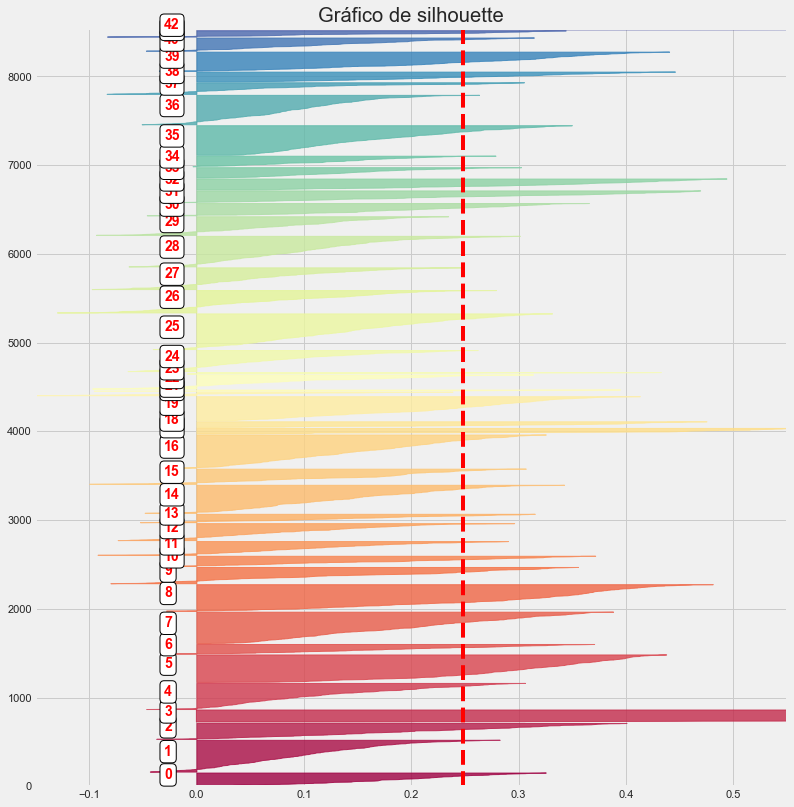

In [108]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters,silhouette_avg):
    
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(12, 13)
    ax1.set_title("Gráfico de silhouette")
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  
     
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.savefig('./Imagenes/CoefSil.png')


sample_silhouette_values = silhouette_samples(X, clusters_tesis)
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(X, clusters_tesis)
silhouette_avg = silhouette_score(X, clusters_tesis,metric='cosine')
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(X), sample_silhouette_values, clusters_tesis,silhouette_avg)

In [37]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

Podemos calcular la distancia desde cada punto hasta su vecino más cercano utilizando los NearestNeighbours. El punto en sí está incluido en n_neighbours. El método de los vecinos arroja dos matrices, una que contiene la distancia a los puntos n_neighbours más cercanos y la otra que contiene el índice para cada uno de esos puntos.

In [38]:
neigh = NearestNeighbors(n_neighbors=2,metric="cosine")
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

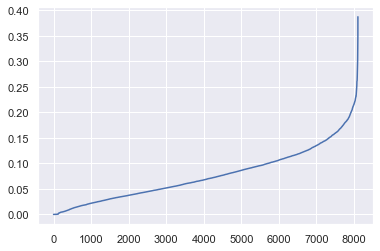

In [39]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

El valor óptimo para épsilon se encontrará en el punto de máxima curvatura.

In [40]:
m = DBSCAN(eps=0.17,metric='cosine')
m.fit(X)

DBSCAN(algorithm='auto', eps=0.17, leaf_size=30, metric='cosine',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [41]:
df_cluster=pd.DataFrame({'id':df.index,'grupo':m.labels_})
df_cluster.grupo.unique()

array([ 0,  1, -1,  4,  2, 12,  3,  9,  5,  6,  7,  8, 10, 11],
      dtype=int64)

In [42]:
df_cluster.grupo.value_counts()

 0     7219
-1      677
 1      138
 2       14
 4       10
 6        8
 5        8
 3        7
 7        5
 12       5
 8        5
 11       4
 9        3
 10       2
Name: grupo, dtype: int64

In [117]:
kmeans = KMeans(n_clusters=43, init="k-means++")
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=43, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [118]:
df_cluster=pd.DataFrame({'id_documento':df.index,'grupo':kmeans.labels_})

In [119]:
df_cluster.head()

,id_documento,grupo
0,1,23
1,2,34
2,3,27
3,4,20
4,5,12


In [120]:
df_cluster.grupo.value_counts()
df_cluster.to_csv("./tesis_grupos.csv",sep="|");

In [153]:
df_cluster.head()

,id_documento,grupo
0,1,5
1,2,19
2,3,17
3,4,6
4,5,14


In [21]:
#modelo k medias
modelo_clustes= KMeans(n_clusters=9, init="k-means++")
modelo_clustes.fit(X)
df['Grupo']=modelo_clustes.predict(X)


def my_wordcloud(data,grupo):
    data=data[data['Grupo']==grupo]
    cadena=''
    for text in data['Contenido_limpio']:
        cadena=cadena+" "+str(text)
    
    wordcloud = WordCloud(background_color="white", max_words=500, contour_width=3, contour_color='steelblue',
                       stopwords=spanish_stopwords)
    # Generate a word cloud
    wordcloud.generate(cadena)
    # Visualize the word cloud
    wordcloud.to_image()

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


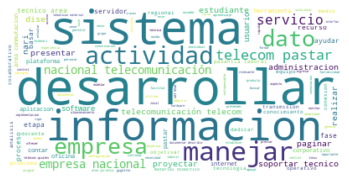

2    43
4    40
3    30
1    26
5    17
7    14
8    12
0    10
6     9
Name: Grupo, dtype: int64

In [32]:
my_wordcloud(df,7)
display(df.Grupo.value_counts())